## 회귀

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### 데이터 불러오기

In [3]:
from sklearn.datasets import load_diabetes # 당뇨병 환자 데이터
def make_dataset():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1), df['target'], test_size=0.2, random_state=1004)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = make_dataset()
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
152,-0.034575,0.050680,-0.000817,0.070072,0.039710,0.066952,-0.065491,0.108111,0.026717,0.073480
417,-0.052738,-0.044642,0.071397,-0.074527,-0.015328,-0.001314,0.004460,-0.021412,-0.046883,0.003064
172,0.041708,0.050680,0.071397,0.008101,0.038334,0.015909,-0.017629,0.034309,0.073407,0.085907
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
296,0.067136,-0.044642,-0.061174,-0.040099,-0.026336,-0.024487,0.033914,-0.039493,-0.056153,-0.059067


In [5]:
# target
y_train.head()

152    292.0
417     55.0
172    295.0
438    104.0
296     89.0
Name: target, dtype: float64

<Axes: >

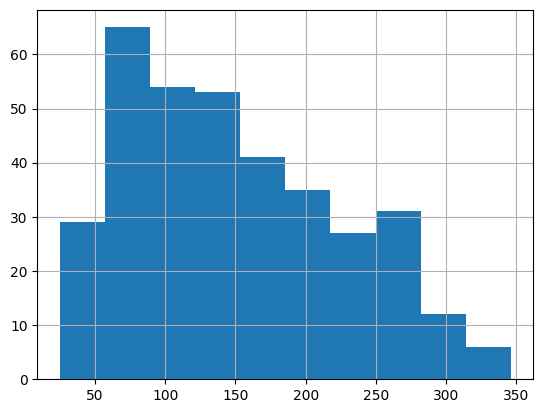

In [7]:
# 타겟 비율 확인
y_train.hist()

### 선형 회귀

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2707.6318521641574

### 릿지 회귀
- L2 규제를 적용한 회귀
- alpha 값을 활용해 조절
    - alpha 값이 커질 수록 회귀 계수를 작게 만듦 (Y=W1*X1+W2*X2+W3*X3)
        

In [16]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

3522.119184207267

In [18]:
# 회귀 계수
coef = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=["alpha_1"])
coef


,alpha_1
age,31.293421
sex,-71.448655
bmi,267.605962
bp,197.362492
s1,14.613257
s2,-13.884237
s3,-124.649836
s4,106.212967
s5,221.068493
s6,101.202546


In [19]:
model = Ridge(alpha=10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

5521.884843903384

In [21]:
coef["alpha_10"] = model.coef_
coef

,alpha_1,alpha_10
age,31.293421,16.703166
sex,-71.448655,-1.796418
bmi,267.605962,61.026376
bp,197.362492,47.434846
s1,14.613257,18.491238
s2,-13.884237,13.440104
s3,-124.649836,-35.542087
s4,106.212967,38.896140
s5,221.068493,55.276290
s6,101.202546,35.868345


In [22]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2744.9026742146716

In [23]:
# 회귀 계수
coef["alpha_0.1"] = model.coef_
coef

,alpha_1,alpha_10,alpha_0.1
age,31.293421,16.703166,4.275162
sex,-71.448655,-1.796418,-205.210484
bmi,267.605962,61.026376,450.909749
bp,197.362492,47.434846,331.923682
s1,14.613257,18.491238,-84.311149
s2,-13.884237,13.440104,-54.662514
s3,-124.649836,-35.542087,-158.706512
s4,106.212967,38.896140,114.066890
s5,221.068493,55.276290,391.231834
s6,101.202546,35.868345,78.555458


In [24]:
model = Ridge(alpha=0.05)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2699.6595785438326

In [25]:
coef["alpha_0.05"] = model.coef_
coef

,alpha_1,alpha_10,alpha_0.1,alpha_0.05
age,31.293421,16.703166,4.275162,-0.508850
sex,-71.448655,-1.796418,-205.210484,-223.345659
bmi,267.605962,61.026376,450.909749,469.447848
bp,197.362492,47.434846,331.923682,348.368885
s1,14.613257,18.491238,-84.311149,-146.952481
s2,-13.884237,13.440104,-54.662514,-18.297550
s3,-124.649836,-35.542087,-158.706512,-141.658486
s4,106.212967,38.896140,114.066890,115.860926
s5,221.068493,55.276290,391.231834,432.508101
s6,101.202546,35.868345,78.555458,69.578796


In [26]:
# Q. 릿지 회귀의 alpha 값을 0.001, 0.01, 0.05, 0.1, 1, 10을 각각 넣어보고,
# 어떤 alpha 값이 가장 mean squared error가 작은지 찾아보세요.
# 힌트 : for문을 사용하면 좀더 효율적으로 퀴즈를 풀 수 있습니다.
from sklearn.linear_model import Ridge

alpha_list = [0.001, 0.01, 0.05, 0.1, 1, 10]

for alpha in alpha_list:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(f"alpha({alpha}) - {mse}")

alpha(0.001) - 2698.040606957027
alpha(0.01) - 2675.811312404546
alpha(0.05) - 2699.6595785438326
alpha(0.1) - 2744.9026742146716
alpha(1) - 3522.119184207267
alpha(10) - 5521.884843903384


### 라쏘 회귀
- L1 규제

In [28]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

4179.152642946343

In [31]:
coef = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=["alpha_1"])
coef

,alpha_1
age,0.000000
sex,-0.000000
bmi,343.589790
bp,46.369923
s1,0.000000
s2,0.000000
s3,-0.000000
s4,0.000000
s5,245.170617
s6,0.000000


In [32]:
model = Lasso(alpha=2)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

6398.637179449031

In [33]:
coef["alpha_2"] = model.coef_
coef

,alpha_1,alpha_2
age,0.000000,0.000000
sex,-0.000000,0.000000
bmi,343.589790,42.963888
bp,46.369923,0.000000
s1,0.000000,0.000000
s2,0.000000,0.000000
s3,-0.000000,-0.000000
s4,0.000000,0.000000
s5,245.170617,0.000000
s6,0.000000,0.000000


In [34]:
model = Lasso(alpha=0.05)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2703.4583679188177

In [35]:
coef["alpha_0.05"] = model.coef_
coef

,alpha_1,alpha_2,alpha_0.05
age,0.000000,0.000000,-0.000000
sex,-0.000000,0.000000,-198.948213
bmi,343.589790,42.963888,487.198584
bp,46.369923,0.000000,340.490360
s1,0.000000,0.000000,-95.576361
s2,0.000000,0.000000,-0.000000
s3,-0.000000,-0.000000,-189.867452
s4,0.000000,0.000000,10.487703
s5,245.170617,0.000000,457.332197
s6,0.000000,0.000000,39.292925


In [37]:
# Q. 라쏘 회귀의 alpha 값을 0.001, 0.01, 0.05, 0.1, 1, 10을 각각 넣어보고,
# 어떤 alpha 값이 가장 mean squared error가 작은지 찾아보세요.
from sklearn.linear_model import Lasso

alpha_list = [0.001, 0.01, 0.05, 0.1, 1, 10]

for alpha in alpha_list:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(f"alpha({alpha}) - {mse}")
    

alpha(0.001) - 2701.7138710371505
alpha(0.01) - 2676.3872487581543
alpha(0.05) - 2703.4583679188177
alpha(0.1) - 2775.1864029910666
alpha(1) - 4179.152642946343
alpha(10) - 6595.844885678807


### 엘라스틱넷 회귀

In [38]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
print(f"alpha({alpha}) - {mse}")

alpha(10) - 6539.270961171604


In [40]:
model = ElasticNet(alpha=0.0001, l1_ratio=0.6)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
print(f"alpha({alpha}) - {mse}")

alpha(10) - 2675.6031657225312


In [41]:
# Q. 엘라스틱넷 회귀의 alpha 값을 0.0001로 설정하고, 
# l1 규제의 비율 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 중
# 어떤 비율일 때 mean squared error가 가장 작은지 찾아보세요.
from sklearn.linear_model import ElasticNet

l1_ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for l1r in l1_ratio:
    model = ElasticNet(alpha=0.0001, l1_ratio=l1r)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(f"alpha({alpha}) - {mse}")

alpha(10) - 2685.134698829498
alpha(10) - 2682.6456826176523
alpha(10) - 2680.3419734521553
alpha(10) - 2678.299021563081
alpha(10) - 2676.6433555725375
alpha(10) - 2675.6031657225312
alpha(10) - 2675.6310323500484
alpha(10) - 2677.6512877013397
alpha(10) - 2684.6233839896468


### 랜덤포레스트, XGBoost

In [45]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

3331.4653157303374

In [48]:
# XGBoost
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

4265.475533439266

In [50]:
# Q. 다음 빈칸을 채워서 랜덤포레스트와 xgboost 모델의 mse 값을 비교해보세요.
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

model_r = RandomForestRegressor()
model_r.fit(X_train, y_train)
pred_r = model_r.predict(X_test)
print("랜덤포레스트")
print(mean_squared_error(y_test, pred))

model_x = XGBRegressor()
model_x.fit(X_train, y_train)
pred_x = model_x.predict(X_test)
print("xgboost")
print(mean_squared_error(y_test, pred))

랜덤포레스트
4265.475533439266
xgboost
4265.475533439266


### 하이퍼파라미터 튜닝